<a href="https://colab.research.google.com/github/Shah0912/TRINIT_GENERIC_TEAM_NAME_ML04/blob/master/Copy_of_TRINIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
DATASET = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=UIVCJKIG5EFRG7ZU"

In [ ]:
DATASET

'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=UIVCJKIG5EFRG7ZU'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json(DATASET, orient="records")

df['data'] = df['Time Series (Daily)']

In [ ]:
df.head(10)

,Meta Data,Time Series (Daily),data
1. Information,"Daily Prices (open, high, low, close) and Volumes",NaN,NaN
2. Symbol,IBM,NaN,NaN
3. Last Refreshed,2022-01-28,NaN,NaN
4. Output Size,Compact,NaN,NaN
5. Time Zone,US/Eastern,NaN,NaN
2022-01-28,NaN,"{'1. open': '133.1900', '2. high': '134.5300',...","{'1. open': '133.1900', '2. high': '134.5300',..."
2022-01-27,NaN,"{'1. open': '133.6600', '2. high': '134.7500',...","{'1. open': '133.6600', '2. high': '134.7500',..."
2022-01-26,NaN,"{'1. open': '136.4700', '2. high': '137.0700',...","{'1. open': '136.4700', '2. high': '137.0700',..."
2022-01-25,NaN,"{'1. open': '129.1400', '2. high': '137.3361',...","{'1. open': '129.1400', '2. high': '137.3361',..."
2022-01-24,NaN,"{'1. open': '127.9900', '2. high': '129.1500',...","{'1. open': '127.9900', '2. high': '129.1500',..."


In [ ]:
df = df.iloc[5: , :]
df.reset_index(level=0, inplace=True)

In [ ]:
df.dtypes

index                  object
Meta Data              object
Time Series (Daily)    object
data                   object
dtype: object

In [ ]:
df.head()

,index,Meta Data,Time Series (Daily),data
0,2022-01-28,NaN,"{'1. open': '133.1900', '2. high': '134.5300',...","{'1. open': '133.1900', '2. high': '134.5300',..."
1,2022-01-27,NaN,"{'1. open': '133.6600', '2. high': '134.7500',...","{'1. open': '133.6600', '2. high': '134.7500',..."
2,2022-01-26,NaN,"{'1. open': '136.4700', '2. high': '137.0700',...","{'1. open': '136.4700', '2. high': '137.0700',..."
3,2022-01-25,NaN,"{'1. open': '129.1400', '2. high': '137.3361',...","{'1. open': '129.1400', '2. high': '137.3361',..."
4,2022-01-24,NaN,"{'1. open': '127.9900', '2. high': '129.1500',...","{'1. open': '127.9900', '2. high': '129.1500',..."


In [ ]:
df.describe()

,index,Meta Data,Time Series (Daily),data
count,100,0,100,100
unique,100,0,100,100
top,2022-01-28,NaN,"{'1. open': '122.5600', '2. high': '122.9000',...","{'1. open': '122.5600', '2. high': '122.9000',..."
freq,1,NaN,1,1


In [ ]:
df = df.drop(['Meta Data', 'Time Series (Daily)'], axis=1)

In [ ]:
df.columns

Index(['index', 'data'], dtype='object')

In [ ]:
df.head()

,index,data
0,2022-01-28,"{'1. open': '133.1900', '2. high': '134.5300',..."
1,2022-01-27,"{'1. open': '133.6600', '2. high': '134.7500',..."
2,2022-01-26,"{'1. open': '136.4700', '2. high': '137.0700',..."
3,2022-01-25,"{'1. open': '129.1400', '2. high': '137.3361',..."
4,2022-01-24,"{'1. open': '127.9900', '2. high': '129.1500',..."


In [ ]:
df.iloc[0][1]['2. high']

'134.5300'

In [ ]:
df.head()

,index,data
0,2022-01-28,"{'1. open': '133.1900', '2. high': '134.5300',..."
1,2022-01-27,"{'1. open': '133.6600', '2. high': '134.7500',..."
2,2022-01-26,"{'1. open': '136.4700', '2. high': '137.0700',..."
3,2022-01-25,"{'1. open': '129.1400', '2. high': '137.3361',..."
4,2022-01-24,"{'1. open': '127.9900', '2. high': '129.1500',..."


In [ ]:
normalized_df = pd.json_normalize(df.data)

In [ ]:
# df['index'] = df['index']
df['Date']= pd.to_datetime(df['index'])

In [ ]:
normalized_df['date'] = df['Date']

In [ ]:
normalized_df.columns = ['open', 'high', 'low', 'close', 'volume', 'date']

In [ ]:
normalized_df['open'] = pd.to_numeric(normalized_df['open'])
normalized_df['high'] = pd.to_numeric(normalized_df['high'])
normalized_df['low'] = pd.to_numeric(normalized_df['low'])
normalized_df['close'] = pd.to_numeric(normalized_df['close'])
normalized_df['volume'] = pd.to_numeric(normalized_df['volume'])

In [ ]:
normalized_df.head()

,open,high,low,close,volume,date
0,133.19,134.5300,131.790,134.50,5471497,2022-01-28
1,133.66,134.7500,132.080,132.52,5499566,2022-01-27
2,136.47,137.0700,133.130,134.26,8335992,2022-01-26
3,129.14,137.3361,128.300,136.10,19715698,2022-01-25
4,127.99,129.1500,124.193,128.82,13777648,2022-01-24


In [ ]:
normalized_df['target'] = normalized_df['close'].shift(-1)

In [ ]:
normalized_df.dtypes

open             float64
high             float64
low              float64
close            float64
volume             int64
date      datetime64[ns]
target           float64
dtype: object

In [ ]:
normalized_df = normalized_df.iloc[:-1, :]
# df = df.iloc[5: , :]

In [ ]:
normalized_df['volume'].max()

31466529

#IMPORT

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


#Load Dataset

In [ ]:
DATASET = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=UIVCJKIG5EFRG7ZU"

In [ ]:
df = pd.read_json(DATASET, orient="records")

df['data'] = df['Time Series (Daily)']

#PREPROCESSING

In [ ]:
df = df.iloc[5: , :]
# df.plot.line(y="Close", use_index=True)
df.reset_index(level=0, inplace=True)

In [ ]:
df = df.drop(['Meta Data', 'Time Series (Daily)'], axis=1)

In [ ]:
normalized_df = pd.json_normalize(df.data)

In [ ]:
df['Date']= pd.to_datetime(df['index'])

In [ ]:
normalized_df['date'] = df['Date']

In [ ]:
normalized_df.columns = ['open', 'high', 'low', 'close', 'volume', 'date']
# normalized_df.columns = ['open', 'high', 'low', 'close', 'volume']

In [ ]:
normalized_df['open'] = pd.to_numeric(normalized_df['open'])
normalized_df['high'] = pd.to_numeric(normalized_df['high'])
normalized_df['low'] = pd.to_numeric(normalized_df['low'])
normalized_df['close'] = pd.to_numeric(normalized_df['close'])
normalized_df['volume'] = pd.to_numeric(normalized_df['volume'])

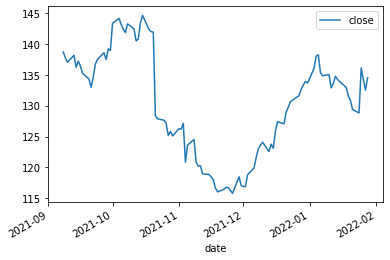

In [ ]:
normalized_df.plot.line(y="close", x="date")
# normalized_df.plot.line(y="close", use_index=True)

In [ ]:
data = normalized_df[["close"]]
data = data.rename(columns = {'close':'Actual_Close'})

In [ ]:
data["Target"] = normalized_df.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["close"]

In [ ]:
data.head()

,Actual_Close,Target
0,134.50,NaN
1,132.52,0.0
2,134.26,1.0
3,136.10,1.0
4,128.82,0.0


In [ ]:
normalized_df_prev = normalized_df.copy()
normalized_df_prev = normalized_df_prev.shift(1)

In [ ]:
normalized_df_prev.head()

,open,high,low,close,volume,date
0,NaN,NaN,NaN,NaN,NaN,NaT
1,133.19,134.5300,131.79,134.50,5471497.0,2022-01-28
2,133.66,134.7500,132.08,132.52,5499566.0,2022-01-27
3,136.47,137.0700,133.13,134.26,8335992.0,2022-01-26
4,129.14,137.3361,128.30,136.10,19715698.0,2022-01-25


In [ ]:
predictors = ["close", "volume", "open", "high", "low"]
data = data.join(normalized_df_prev[predictors]).iloc[1:]

In [ ]:
data.head()

,Actual_Close,Target,close,volume,open,high,low
1,132.52,0.0,134.50,5471497.0,133.19,134.5300,131.790
2,134.26,1.0,132.52,5499566.0,133.66,134.7500,132.080
3,136.10,1.0,134.26,8335992.0,136.47,137.0700,133.130
4,128.82,0.0,136.10,19715698.0,129.14,137.3361,128.300
5,129.35,1.0,128.82,13777648.0,127.99,129.1500,124.193


In [ ]:
data_nn = data

In [ ]:
# normalized_df['target'] = normalized_df['close'].shift(-1)

In [ ]:
# normalized_df = normalized_df.iloc[:-1, :]

In [ ]:

def get_normalised_data(data):
    """
    Normalises the data values using MinMaxScaler from sklearn
    :param data: a DataFrame with columns as  ['index','Open','Close','Volume']
    :return: a DataFrame with normalised value for all the columns except index
    """
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler()
    numerical = ['open', 'close', 'high', 'low', 'volume']
    data[numerical] = scaler.fit_transform(data[numerical])

    return data


In [ ]:
normalized_df = get_normalised_data(normalized_df)

In [ ]:
normalized_df.head()

,open,high,low,close,volume,date
0,0.611429,0.613349,0.610344,0.648958,0.098101,2022-01-28
1,0.627227,0.620765,0.620616,0.580208,0.099075,2022-01-27
2,0.721681,0.698972,0.657811,0.640625,0.197485,2022-01-26
3,0.475294,0.707942,0.486716,0.704514,0.592304,2022-01-25
4,0.436639,0.431991,0.341233,0.451736,0.386283,2022-01-24


#MODEL

#LSTM

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
model = RandomForestClassifier(n_estimators=100, random_state=1)

In [ ]:
train = data.iloc[:-35]
test = data.iloc[-35:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(random_state=1)

In [ ]:
from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

1.0

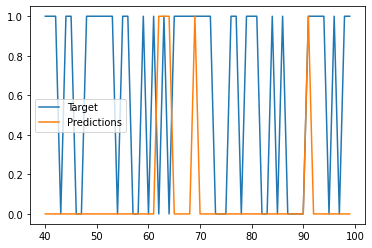

In [ ]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

In [ ]:
i = 1000
step = 750

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()
model.fit(train[predictors], train["Target"])
preds = model.predict(test[predictors])

##Neural Network

In [ ]:
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
data.head()

,Actual_Close,Target,close,volume,open,high,low
1,132.52,0.0,134.50,5471497.0,133.19,134.5300,131.790
2,134.26,1.0,132.52,5499566.0,133.66,134.7500,132.080
3,136.10,1.0,134.26,8335992.0,136.47,137.0700,133.130
4,128.82,0.0,136.10,19715698.0,129.14,137.3361,128.300
5,129.35,1.0,128.82,13777648.0,127.99,129.1500,124.193


In [ ]:
weekly_mean = data.rolling(7).mean()["close"]
quarterly_mean = data.rolling(90).mean()["close"]
# annual_mean = data.rolling(365).mean()["close"]

In [ ]:
weekly_trend = data.shift(1).rolling(7).sum()["Target"]

In [ ]:
data["weekly_mean"] = weekly_mean / data["close"]
data["quarterly_mean"] = quarterly_mean / data["close"]
# data["annual_mean"] = annual_mean / data["close"]

In [ ]:
# data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
# data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]

In [ ]:
data["weekly_trend"] = weekly_trend

In [ ]:
data["open_close_ratio"] = data["open"] / data["close"]
data["high_close_ratio"] = data["high"] / data["close"]
data["low_close_ratio"] = data["low"] / data["close"]

In [ ]:
# full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high"]
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "open_close_ratio", "high"]


In [ ]:
x_res = data[full_predictors]
# x_res = x_res.drop(['Target'], axis = 1)
# x_res['open'] = x_res['open']/1000
# x_res['close'] = x_res['close']/1000
# x_res['high'] = x_res['high']/1000
# x_res['low'] = x_res['low']/1000
# x_res['volume'] = x_res['volume']/10000000
x_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 1 to 99
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   close             99 non-null     float64
 1   volume            99 non-null     float64
 2   open              99 non-null     float64
 3   high              99 non-null     float64
 4   low               99 non-null     float64
 5   weekly_mean       93 non-null     float64
 6   quarterly_mean    10 non-null     float64
 7   open_close_ratio  99 non-null     float64
 8   high              99 non-null     float64
dtypes: float64(9)
memory usage: 7.1 KB


In [ ]:
y_res = data['Target']
y_res.head()

1    0.0
2    1.0
3    1.0
4    0.0
5    1.0
Name: Target, dtype: float64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_res, y_res, test_size=0.4,random_state=42)

In [ ]:
X_test = X_val[20:]
y_test = y_val[20:]
X_val = X_val[:20]
y_val = y_val[:20]

In [ ]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_val shape: ",X_val.shape)
print("y_val shape: ",y_val.shape)
print("X_test shape: ",X_test.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (59, 9)
y_train shape:  (59,)
X_val shape:  (20, 9)
y_val shape:  (20,)
X_test shape:  (20, 9)
X_test shape:  (20, 9)


In [ ]:
X_train.dtypes

close               float64
volume              float64
open                float64
high                float64
low                 float64
weekly_mean         float64
quarterly_mean      float64
open_close_ratio    float64
high                float64
dtype: object

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[-1])))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.LSTM(20,return_sequences=False))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
)

ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras

metrics = [
           keras.metrics.BinaryAccuracy(name='accuracy'),
           keras.metrics.AUC(name='auc')
          ]

ES = tf.keras.callbacks.EarlyStopping(monitor="val_auc",patience=20,restore_best_weights=True, mode='max', verbose=1)
Rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.5,
                              patience=10, min_lr=0.000001)
callbacks = [ES, Rlr]

model = keras.Sequential()
model.add(keras.layers.Dense(32,activation='relu',input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = metrics)
model.fit(
          x=X_train,
          y=y_train,
          epochs = 500,
          batch_size=512,
          validation_data =(X_val, y_val),
          callbacks=[ES, Rlr],
         )

Epoch 1/500


InvalidArgumentError: ignored

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

InvalidArgumentError: ignored